In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv(r"C:\Users\Aathira\Desktop\K_meansClassicfication\cluster_data.csv")
print(df.head())
print(df.info())


   Feature 1  Feature 2
0   2.698582  -0.672960
1  -0.128113   4.355952
2   2.509049   5.773146
3  -1.518276   3.444886
4  -0.072283   2.883769
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  500 non-null    float64
 1   Feature 2  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None


In [5]:
X = df.iloc[:, :-1]   # last column drop pannra mathiri


In [7]:
X

,Feature 1
0,2.698582
1,-0.128113
2,2.509049
3,-1.518276
4,-0.072283
...,...
495,10.303693
496,-0.730000
497,-3.478708
498,-2.081214


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_scaled

array([[ 2.12448886e-01],
       [-4.80018865e-01],
       [ 1.66018243e-01],
       [-8.20573067e-01],
       [-4.66341857e-01],
       [ 1.79495799e+00],
       [-3.79624596e-01],
       [ 1.72362970e+00],
       [-3.44871923e-02],
       [-6.26499963e-02],
       [-1.16799802e+00],
       [-1.07208080e+00],
       [-3.64865930e-01],
       [-9.27112648e-01],
       [-7.10631603e-01],
       [ 1.63942012e+00],
       [-5.33279259e-01],
       [ 1.83555749e+00],
       [-3.91919113e-01],
       [-1.14904433e+00],
       [-1.66392986e-02],
       [ 2.05246860e+00],
       [-5.58556028e-01],
       [-5.46210115e-01],
       [-1.32342278e-01],
       [-5.55340745e-01],
       [-3.32925899e-01],
       [ 2.42666154e-01],
       [-1.04291387e+00],
       [-1.16711149e+00],
       [-5.87157480e-02],
       [-4.94905097e-01],
       [-4.06288043e-01],
       [-9.84451392e-01],
       [-5.31836831e-01],
       [ 3.97564754e-02],
       [-4.30013936e-02],
       [ 2.00821197e+00],
       [ 1.9

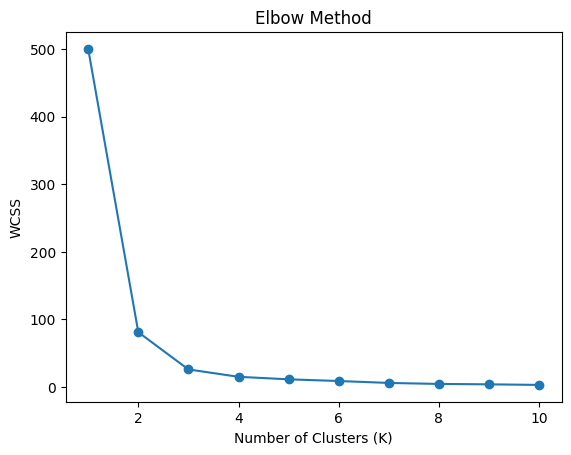

In [10]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
print(df.head())


   Feature 1  Feature 2  Cluster
0   2.698582  -0.672960        0
1  -0.128113   4.355952        2
2   2.509049   5.773146        0
3  -1.518276   3.444886        2
4  -0.072283   2.883769        2


In [13]:
scaler.fit(X)


,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [14]:
print(X.shape)
print(X.columns)


(500, 1)
Index(['Feature 1'], dtype='object')


In [15]:
new_data = [[100]]   # ONLY ONE FEATURE
new_data_scaled = scaler.transform(new_data)

prediction = kmeans.predict(new_data_scaled)
print("Predicted Cluster:", prediction[0])


Predicted Cluster: 1


c:\Users\Aathira\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
print(df.columns)


Index(['Feature 1', 'Feature 2', 'Cluster'], dtype='object')


In [19]:
X = df[['Feature 1', 'Feature 2']]


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [21]:
new_data = [[100, 50000]]
new_data_scaled = scaler.transform(new_data)

prediction = kmeans.predict(new_data_scaled)
print("Predicted Cluster:", prediction[0])


Predicted Cluster: 2


c:\Users\Aathira\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


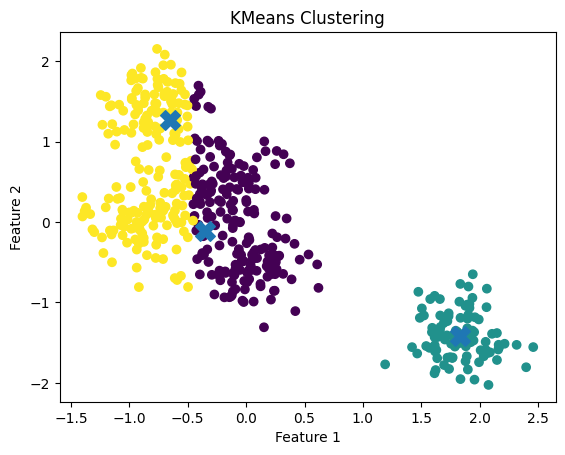

In [22]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering")
plt.show()
